<a href="https://colab.research.google.com/github/melihkacaman/neckline_classifier_Aydinli/blob/main/02.1%20Models_Creation%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Mar 13 06:18:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import py7zr

archive = py7zr.SevenZipFile('/content/drive/MyDrive/datasets/data/data_min_balanced_df.7z', mode='r')
archive.extractall(path="/content")
archive.close()

# Constants 

In [6]:
IMG_SIZE = (224, 224) 
train_dir, test_dir = "/content/data_min_balanced_df/train/", "/content/data_min_balanced_df/test/"  

In [7]:
import tensorflow as tf 

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical", 
    batch_size=32) 

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical", 
    batch_size=32) 

Found 11987 files belonging to 6 classes.
Found 1500 files belonging to 6 classes.


In [8]:
train_data.class_names, test_data.class_names

(['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5'],
 ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5'])

In [9]:
for images, labels in train_data.take(1): 
    print(images.shape, labels.shape)

(32, 224, 224, 3) (32, 6)


# Model 0: Efficient Net B0 

In [10]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False 

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs) 
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) 
outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs) 

In [11]:
model_0.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.Accuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 


In [12]:
checkpoint_path = "/content/drive/MyDrive/datasets/data/checkpoints/MODEL_0/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [13]:
model_0.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 6)                 7686      
                                                                 
Total params: 4,057,257
Trainable params: 7,686
Non-trainable params: 4,049,571
_________________________________________________________________


In [14]:
# 10. Fit the model 
history_model_0 = model_0.fit(
    train_data, 
    epochs=10, 
    steps_per_epoch=len(train_data), 
    validation_data = test_data,
    callbacks=[checkpoint_callback],
    validation_steps=int(0.25 * len(test_data))
)

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.8008 - accuracy: 0.9091 - precision: 0.8844 - recall: 0.5226
Epoch 1: saving model to /content/drive/MyDrive/datasets/data/checkpoints/MODEL_0/checkpoint-1.ckpt
375/375 [==============================] - 53s 98ms/step - loss: 0.8008 - accuracy: 0.9091 - precision: 0.8844 - recall: 0.5226 - val_loss: 0.4759 - val_accuracy: 0.9455 - val_precision: 0.9158 - val_recall: 0.7415
Epoch 2/10
374/375 [============================>.] - ETA: 0s - loss: 0.5244 - accuracy: 0.9409 - precision: 0.8885 - recall: 0.7378
Epoch 2: saving model to /content/drive/MyDrive/datasets/data/checkpoints/MODEL_0/checkpoint-2.ckpt
375/375 [==============================] - 32s 83ms/step - loss: 0.5242 - accuracy: 0.9409 - precision: 0.8886 - recall: 0.7379 - val_loss: 0.4477 - val_accuracy: 0.9474 - val_precision: 0.8900 - val_recall: 0.7812
Epoch 3/10
374/375 [============================>.] - ETA: 0s - loss: 0.4563 - accuracy: 0.9493 - precis

In [15]:
model_0.evaluate(test_data)

47/47 [==============================] - 5s 87ms/step - loss: 0.3428 - accuracy: 0.9646 - precision: 0.9132 - recall: 0.8700


[0.34277501702308655,
 0.964555561542511,
 0.9132260084152222,
 0.8700000047683716]

## Fine Tuning 

In [16]:
for layer in model_0.layers: 
  print(layer.trainable)

True
False
True
True


In [17]:
len(base_model.trainable_variables)

0

In [18]:
base_model.trainable = True 

for layer in base_model.layers[:-10]:
  layer.trainable = False 

model_0.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
     metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
              tf.keras.metrics.Precision(name='precision'),
              tf.keras.metrics.Recall(name='recall')])


In [19]:
# Fine tune for another 5 epochs
fine_tune_epochs = 10 + 5

# Refit the model (same as model_2 except with more trainable layers)
history_model_0_fine = model_0.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  validation_data=test_data,
                                  initial_epoch=history_model_0.epoch[-1], # start from previous last epoch
                                  validation_steps=int(0.25 * len(test_data)),
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 10/15
375/375 [==============================] - ETA: 0s - loss: 0.3144 - accuracy: 0.9640 - precision: 0.9125 - recall: 0.8669
Epoch 10: saving model to /content/drive/MyDrive/datasets/data/checkpoints/MODEL_0/checkpoint-10.ckpt
375/375 [==============================] - 46s 105ms/step - loss: 0.3144 - accuracy: 0.9640 - precision: 0.9125 - recall: 0.8669 - val_loss: 0.2706 - val_accuracy: 0.9725 - val_precision: 0.9273 - val_recall: 0.9062
Epoch 11/15
375/375 [==============================] - ETA: 0s - loss: 0.2424 - accuracy: 0.9738 - precision: 0.9352 - recall: 0.9054
Epoch 11: saving model to /content/drive/MyDrive/datasets/data/checkpoints/MODEL_0/checkpoint-11.ckpt
375/375 [==============================] - 35s 93ms/step - loss: 0.2424 - accuracy: 0.9738 - precision: 0.9352 - recall: 0.9054 - val_loss: 0.2717 - val_accuracy: 0.9777 - val_precision: 0.9446 - val_recall: 0.9205
Epoch 12/15
375/375 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9782 

In [20]:
import matplotlib.pyplot as plt 

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

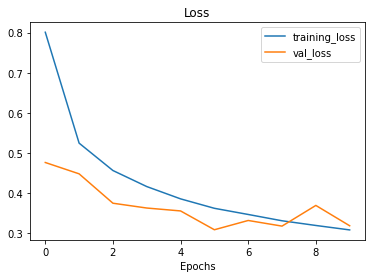

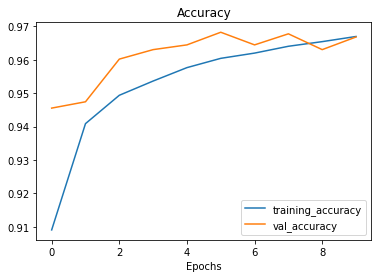

In [21]:
plot_loss_curves(history_model_0)

In [22]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """ 
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

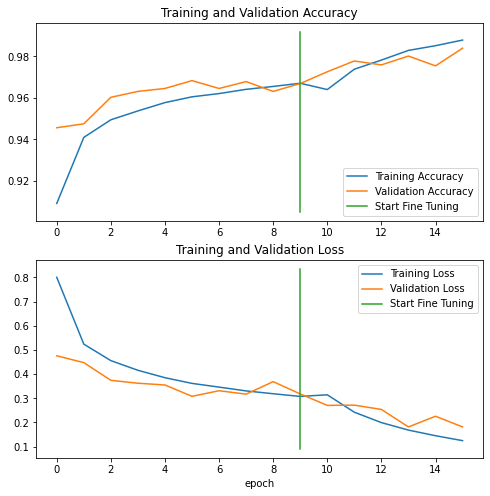

In [30]:
compare_historys(history_model_0, history_model_0_fine, initial_epochs=10)

In [31]:
# /content/drive/MyDrive/datasets/data/checkpoints/MODEL_0/checkpoint-12.ckpt
model_0.load_weights("/content/drive/MyDrive/datasets/data/checkpoints/MODEL_0/checkpoint-15.ckpt") 

In [36]:
model_0.evaluate(test_data)

47/47 [==============================] - 5s 102ms/step - loss: 0.2195 - accuracy: 0.9774 - precision: 0.9385 - recall: 0.9253


[0.21945063769817352,
 0.9774444699287415,
 0.9384719133377075,
 0.9253333210945129]

In [32]:
model_0.save('best_efficient_net_model.h5')

In [35]:
model_0.save('best_efficient_net_model_ep_last.h5')